In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.naive_bayes import BernoulliNB , MultinomialNB , GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import  SVC
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score
df = pd.read_csv('Maternal Health Risk Data Set.csv')

In [2]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [5]:
df.shape

(1014, 7)

In [6]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


# EDA - DATA CLEANING

In [7]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

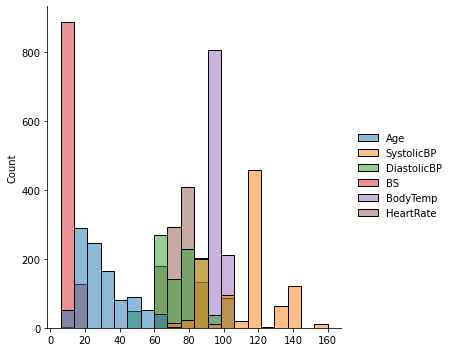

In [8]:
sns.displot(df)

In [9]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

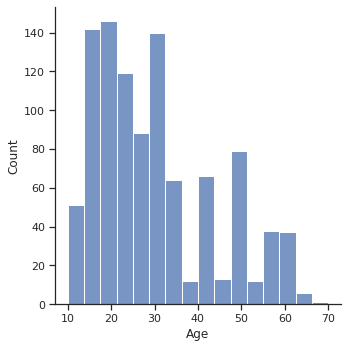

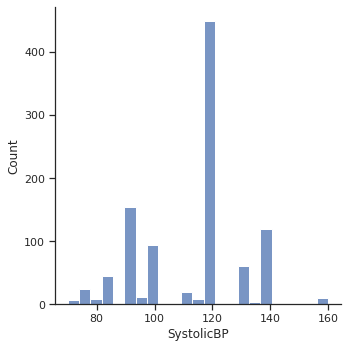

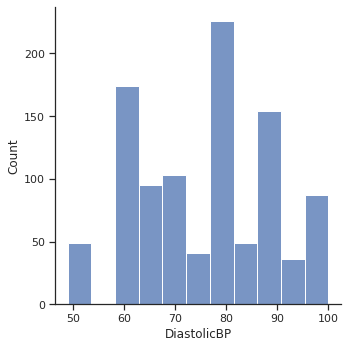

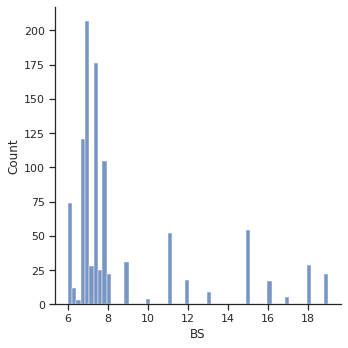

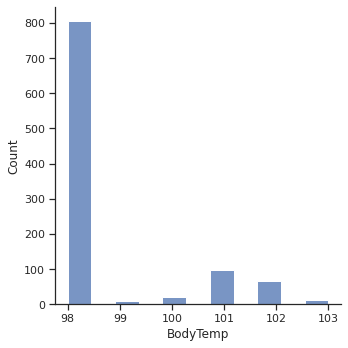

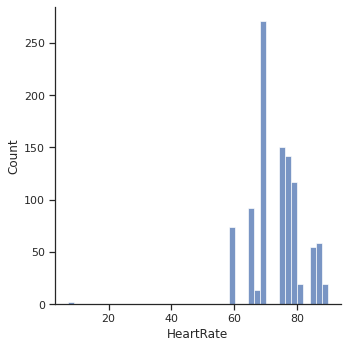

In [10]:
for column in df.columns[:6]:
    sns.set()
    sns.set(style="ticks")
    sns.displot(df[column])
    plt.show()

<AxesSubplot:>

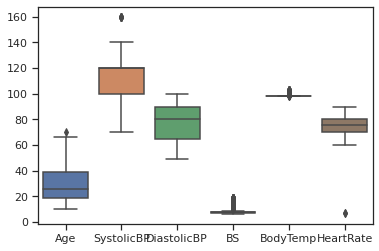

In [11]:
sns.boxplot(data=df)

<AxesSubplot:>

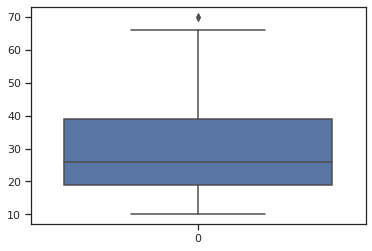

In [12]:
sns.boxplot(df["Age"])

In [13]:
upperlimit=df["Age"].mean()+1.5*df["Age"].std()
lowerlimit=18
print("upper limit",upperlimit)
print("lower limit", lowerlimit)


upper limit 50.08337317074643
lower limit 18


In [14]:
error=df.loc[(df['Age']>=upperlimit)|(df['Age']<=lowerlimit)]
error

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
15,15,120,80,7.01,98.0,70,low risk
19,10,70,50,6.90,98.0,70,low risk
23,18,90,60,7.50,98.0,70,low risk
25,16,100,70,7.20,98.0,80,low risk
35,12,95,60,6.10,102.0,60,low risk
...,...,...,...,...,...,...,...
1002,55,140,95,19.00,98.0,77,high risk
1004,13,90,65,9.00,101.0,80,high risk
1005,17,90,65,7.70,103.0,67,high risk
1006,17,85,60,6.30,102.0,86,high risk


In [15]:
#find the outliers-Z score method
error.describe()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,28.319218,103.172638,70.110749,8.566808,99.332248,73.397394
std,19.764687,19.275594,13.976198,3.201567,1.786030,8.859011
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,15.000000,90.000000,60.000000,6.900000,98.000000,70.000000
50%,17.000000,100.000000,65.000000,7.500000,98.000000,76.000000
75%,55.000000,120.000000,80.000000,7.900000,101.000000,77.000000
max,70.000000,140.000000,100.000000,19.000000,103.000000,90.000000


In [16]:
#remove outliers
new_df=df.loc[(df['Age']<upperlimit)&(df['Age']>=lowerlimit)]
print("Before",len(df))
print("After",len(new_df))
print("Outliers",len(df)-len(new_df))

Before 1014
After 726
Outliers 288


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1008,48,120,80,11.0,98.0,88,high risk
1009,22,120,60,15.0,98.0,80,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


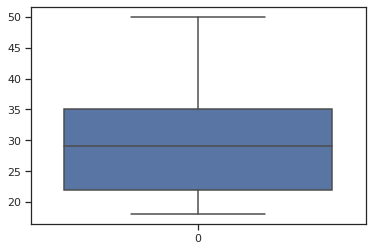

In [17]:
sns.boxplot(new_df['Age'])
new_df

In [18]:
new_df.describe()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,30.217631,117.188705,78.976584,8.750882,98.417906,74.706612
std,9.558070,16.303465,12.917169,3.300208,1.083982,7.639147
min,18.000000,75.000000,50.000000,6.000000,98.000000,60.000000
25%,22.000000,110.000000,70.000000,6.900000,98.000000,70.000000
50%,29.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,50.000000,160.000000,100.000000,19.000000,103.000000,90.000000


/tmp/ipykernel_27032/107374738.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(), cmap='viridis', annot=True)


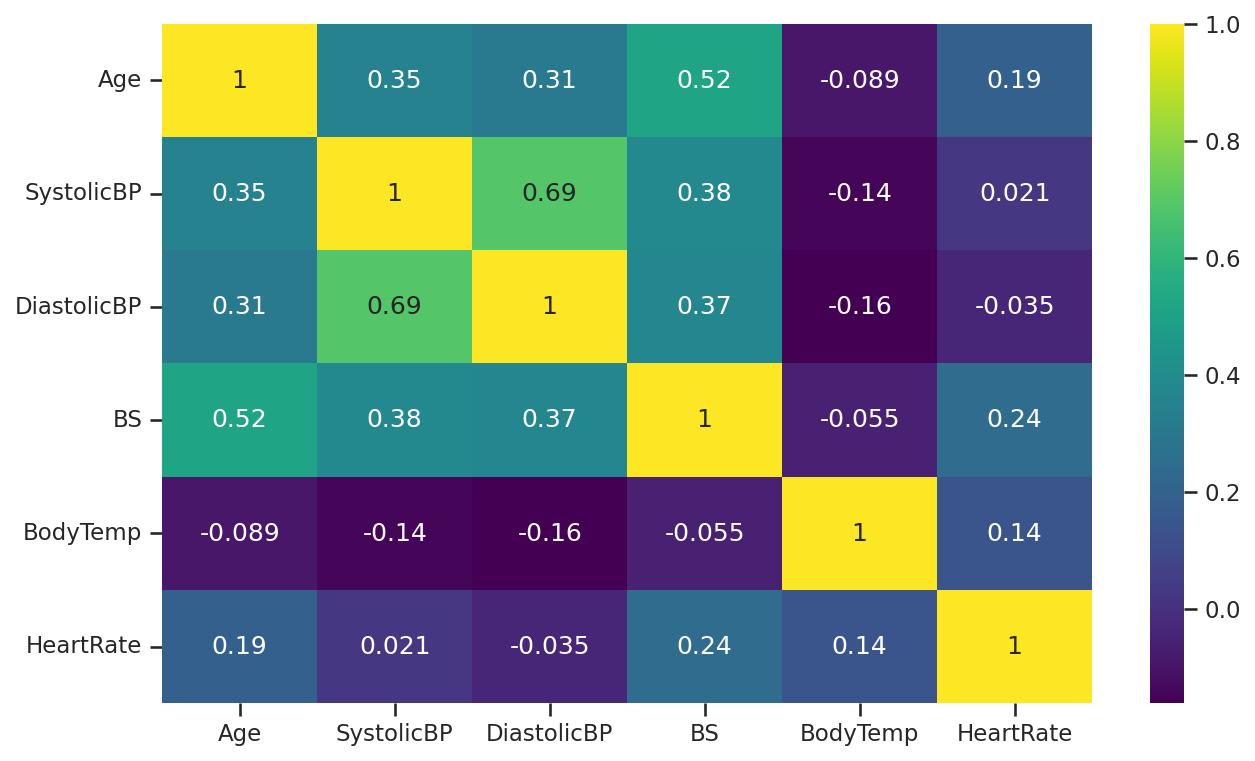

In [19]:
plt.figure(figsize=(10,6), dpi=150)
sns.heatmap(new_df.corr(), cmap='viridis', annot=True)
plt.show()

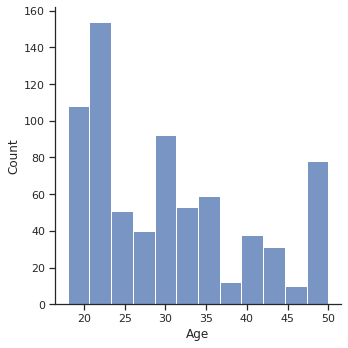

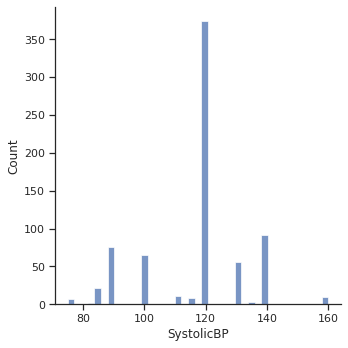

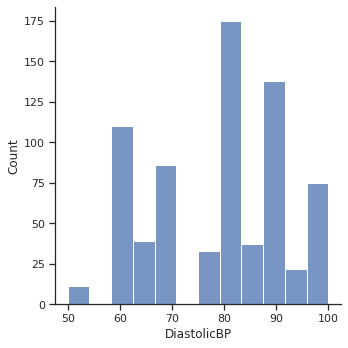

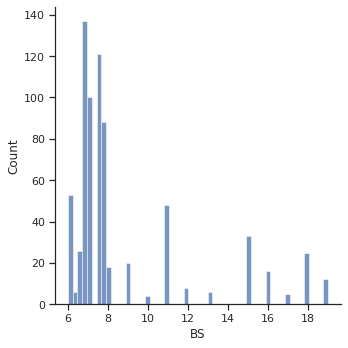

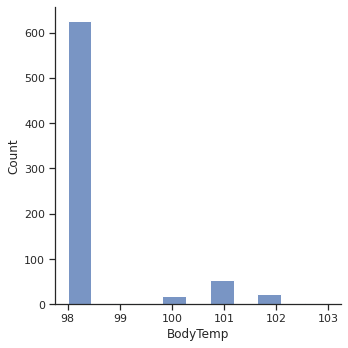

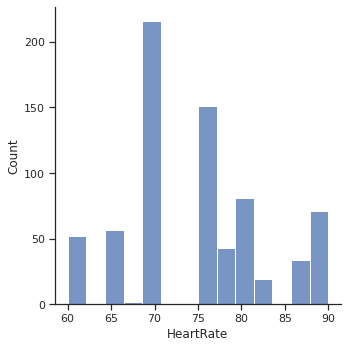

In [20]:
for column in df.columns[:6]:
    sns.set()
    sns.set(style="ticks")
    sns.displot(new_df[column])
    plt.show()

# Model Building


In [21]:
new_df['RiskLevel'].replace({"high risk":"1","mid risk":"0","low risk":"0"}, inplace=True)
new_df['RiskLevel'] = new_df['RiskLevel'].astype(float)
new_df

/tmp/ipykernel_27032/3687399920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['RiskLevel'].replace({"high risk":"1","mid risk":"0","low risk":"0"}, inplace=True)
/tmp/ipykernel_27032/3687399920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['RiskLevel'] = new_df['RiskLevel'].astype(float)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,1.0
1,35,140,90,13.0,98.0,70,1.0
2,29,90,70,8.0,100.0,80,1.0
3,30,140,85,7.0,98.0,70,1.0
4,35,120,60,6.1,98.0,76,0.0
...,...,...,...,...,...,...,...
1008,48,120,80,11.0,98.0,88,1.0
1009,22,120,60,15.0,98.0,80,1.0
1011,35,85,60,19.0,98.0,86,1.0
1012,43,120,90,18.0,98.0,70,1.0


In [22]:
new_df.BodyTemp=(new_df.BodyTemp-32)*5/9
new_df.BS=(new_df.BS*18)
new_df

/tmp/ipykernel_27032/1228070524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.BodyTemp=(new_df.BodyTemp-32)*5/9
/tmp/ipykernel_27032/1228070524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.BS=(new_df.BS*18)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,270.0,36.666667,86,1.0
1,35,140,90,234.0,36.666667,70,1.0
2,29,90,70,144.0,37.777778,80,1.0
3,30,140,85,126.0,36.666667,70,1.0
4,35,120,60,109.8,36.666667,76,0.0
...,...,...,...,...,...,...,...
1008,48,120,80,198.0,36.666667,88,1.0
1009,22,120,60,270.0,36.666667,80,1.0
1011,35,85,60,342.0,36.666667,86,1.0
1012,43,120,90,324.0,36.666667,70,1.0


In [23]:
train , test = train_test_split(new_df,test_size=0.15,random_state=35)
print(f"No. of training examples:{train.shape[0]}")
print(f"No. of testing examples:{test.shape[0]}")

No. of training examples:617
No. of testing examples:109


In [24]:
y_test= test['RiskLevel']
x_test= test.drop('RiskLevel', axis=1)
x_test

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
103,25,140,100,122.4,36.666667,80
974,33,120,75,180.0,36.666667,70
495,42,120,80,142.2,36.666667,70
217,30,140,100,270.0,36.666667,70
846,36,120,90,126.0,36.666667,82
...,...,...,...,...,...,...
997,35,140,100,162.0,36.666667,66
569,23,120,80,135.0,36.666667,70
692,24,120,80,135.0,36.666667,66
422,36,140,100,122.4,38.888889,76


In [25]:
x_train= train.drop('RiskLevel',axis=1)
y_train= train['RiskLevel']
x_train.shape, y_train.shape, x_test.shape, y_test.shape 
x_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
707,32,120,90,124.2,36.666667,70
593,35,140,100,135.0,36.666667,66
150,18,100,70,120.6,36.666667,76
459,32,120,90,122.4,36.666667,70
1009,22,120,60,270.0,36.666667,80
...,...,...,...,...,...,...
346,18,100,70,124.2,36.666667,76
621,32,120,90,135.0,36.666667,70
39,35,100,70,109.8,36.666667,66
378,35,100,70,140.4,36.666667,66


# RANDOM FOREST

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
random_model=RandomForestClassifier(n_estimators=50)
random_model.fit(x_train,y_train)
random_predict=random_model.predict(x_test)
print("Accuracy=",metrics.accuracy_score(y_test,random_predict))
random_result=pd.DataFrame({'Id':test.index,'Predicted Risk':random_predict,'Actual Risk':y_test})
print(random_result)


Accuracy= 0.926605504587156
      Id  Predicted Risk  Actual Risk
103  103             1.0          1.0
974  974             1.0          1.0
495  495             0.0          0.0
217  217             1.0          1.0
846  846             0.0          0.0
..   ...             ...          ...
997  997             1.0          1.0
569  569             0.0          0.0
692  692             0.0          0.0
422  422             1.0          1.0
397  397             1.0          1.0

[109 rows x 3 columns]


In [27]:
cm=confusion_matrix(y_test,random_predict)
cm

array([[75,  6],
       [ 2, 26]])

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, random_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        81
         1.0       0.81      0.93      0.87        28

    accuracy                           0.93       109
   macro avg       0.89      0.93      0.91       109
weighted avg       0.93      0.93      0.93       109



In [29]:
TP=cm[0,0]
TN=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]
classification_accuracy=(((TP+TN)/float(TP+TN+FP+FN)*100))
print('Classification accuracy : {0:0.2f}'.format(classification_accuracy),'%')

Classification accuracy : 92.66 %


In [30]:
#Specificity
specificity = (TN / (TN + FP)*100)
print('Specificity : {0:0.2f}'.format(specificity),'%')

#Sensitivity
Sensitivity = (TP / (TP + FN)*100)
print('Sensitivity : {0:0.2f}'.format(Sensitivity),"%")

Specificity : 81.25 %
Sensitivity : 97.40 %


# ALGORITHM

In [31]:
#create instances 
bn = BernoulliNB()
mn = MultinomialNB()
gb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ex = ExtraTreesClassifier()
sv= SVC()


In [32]:
#Fit the model 
bn.fit(x_train , y_train)
pred = bn.predict(x_test)
accuracy_score(y_test,pred)

0.7431192660550459

In [33]:
#Classes dictionary
classes = {
    "BernoulliNB" : bn,
    "MultinomialNB" : mn,
    "GaussianNB" : gb,
    "DecisionTree" : dt,
    "RandomForest" : rf,
    "ExtraTrees" : ex,
    "SVM":sv
}

In [34]:
#Display items in dictionary
classes.items()



dict_items([('BernoulliNB', BernoulliNB()), ('MultinomialNB', MultinomialNB()), ('GaussianNB', GaussianNB()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('ExtraTrees', ExtraTreesClassifier()), ('SVM', SVC())])

In [35]:
#create a function to predict the accuracy and precision
def scores(xtrain,ytrain,xtest,ytest,clf):
    
    clf.fit(xtrain,ytrain)
    clf.predict(xtest)
    
    return accuracy_score(ytest,clf.predict(xtest)) , precision_score(ytest,clf.predict(xtest))

In [36]:
#Find the scores of each algorithm

precision = []
accuracy = []

for name , cla in classes.items():
    acc , prec = scores(x_train,y_train,x_test,y_test,cla)
    accuracy.append(acc*100)
    precision.append(prec)
    
print(accuracy)

/home/dharithri/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[74.31192660550458, 87.1559633027523, 90.82568807339449, 92.66055045871559, 94.4954128440367, 92.66055045871559, 90.82568807339449]


In [37]:
#create the dataframe
df_val = pd.DataFrame({"Name":classes.keys(),"Accuracy":accuracy,"Precision":precision}).sort_values("Precision",ascending=False)


In [38]:
#Disolay the datafram
df_val


,Name,Accuracy,Precision
4,RandomForest,94.495413,0.866667
2,GaussianNB,90.825688,0.846154
6,SVM,90.825688,0.846154
3,DecisionTree,92.660550,0.812500
5,ExtraTrees,92.660550,0.812500
1,MultinomialNB,87.155963,0.750000
0,BernoulliNB,74.311927,0.000000


<AxesSubplot:xlabel='Name', ylabel='Accuracy'>

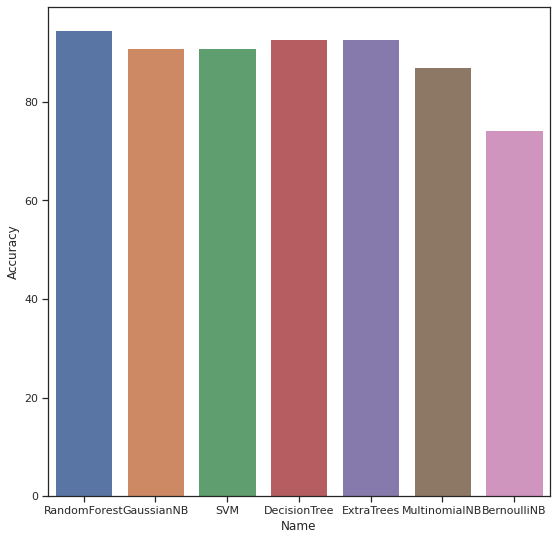

In [39]:
plt.figure(figsize=(9,9))
sns.barplot(x='Name',y='Accuracy', data=df_val)

# VOTING CLASSIFIER

In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

## HARD VOTING

In [41]:
#Defaut is hard and takes majority 
estimator=[('random_forest',rf),('ExtraTreesClassifier',ex)]
vc=VotingClassifier(estimators=estimator)
x=cross_val_score(vc,x_train,y_train, cv=10,scoring="accuracy" )
print(np.round(np.mean(x),2))

0.94


## SOFT VOTING

In [42]:
#takes average of all 0 and 1
vc=VotingClassifier(estimators=estimator,voting='soft',weights=[2,1])
x=cross_val_score(vc,x_train,y_train, cv=10,scoring="accuracy" )
print(np.round(np.mean(x),2))

0.94


In [43]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def risk(Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate):
    x=np.array([Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate])
    prediction=random_model.predict(x.reshape(1, -1))
    if prediction:
        return "High Risk"
    else:
        return "Low risk"


In [44]:
risk(37, 125, 70, 270, 36,72)

/home/dharithri/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'High Risk'

In [ ]:
import gradio as gr
app = gr.Interface(css=".gradio-container {background-color: #ffffff}",fn=risk, inputs=['number','number','number','number','number','number'], outputs='text',title="mAI-Care")
app.launch(debug=True, share= True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://512c5557718ee35699.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
